In [1]:
import numpy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import signal

### Funciones generales:

In [312]:
def cargar(nombre):
    img = Image.open(nombre).convert(mode='L')
    return np.array(img)

def mostrar(imagen, titulo = ""):
    plt.figure(figsize=(9, 9))
    if (titulo): plt.title(titulo)
    plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)

def pasarALog(imagen):
    c = 255 / np.log(1 + np.max(imagen))
    resultado = np.uint8(c * np.log(1 + imagen))
    return resultado

# valor entre 0 y 255
def aplicar_umbral(imagen, valor):
    return np.uint8(np.greater(imagen, valor) * 255)

# suavizado:
def suavizado_promedio(imagen, dimension):
    H = np.ones((dimension, dimension)) / dimension ** 2
    return signal.convolve2d(imagen, H, boundary="symm", mode="same")

def eqHist(imagen):
    hist = np.histogram(imagen, 256, range=(0, 256))
    acumulado = np.cumsum(hist[0])
    normalizado = 255 * ((acumulado - acumulado.min()) / (acumulado.max() - acumulado.min()))
    resultado = np.uint8(normalizado[imagen])
    return resultado

### Ejercicio 1 (verificación)

In [4]:
# verificación 2.c
x = np.array([0, 2, -1, 0, 0, 0])
h = np.array([0, -1, 2, 1, 0])

signal.convolve(h, x)

array([ 0,  0, -2,  5,  0, -1,  0,  0,  0,  0])

### Ejercicio 2 (verificación)

In [25]:
# 2 i
x = np.array([[0, -1, 1], [-1, 4, -1], [0, -1, 0]])
h = np.array([[1, 4, 1], [2, 5, 3]])
signal.convolve2d(x, h, boundary="fill", fillvalue= 0)

array([[ 0, -1, -3,  3,  1],
       [-1, -2, 11,  2,  2],
       [-2,  2, 11,  6, -3],
       [ 0, -2, -5, -3,  0]])

### Ejercicio 3

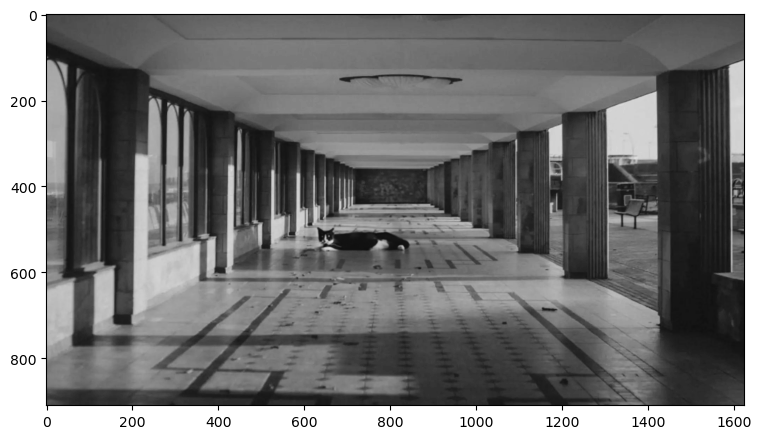

In [239]:
imagenA = cargar("imagen2.png")
mostrar(imagenA)

In [240]:
def ventana_gauss(dimension, desviacion):
    gauss1d = signal.windows.gaussian(dimension, desviacion)
    gauss2d = np.outer(gauss1d, gauss1d)
    return gauss2d / sum(sum(gauss2d))

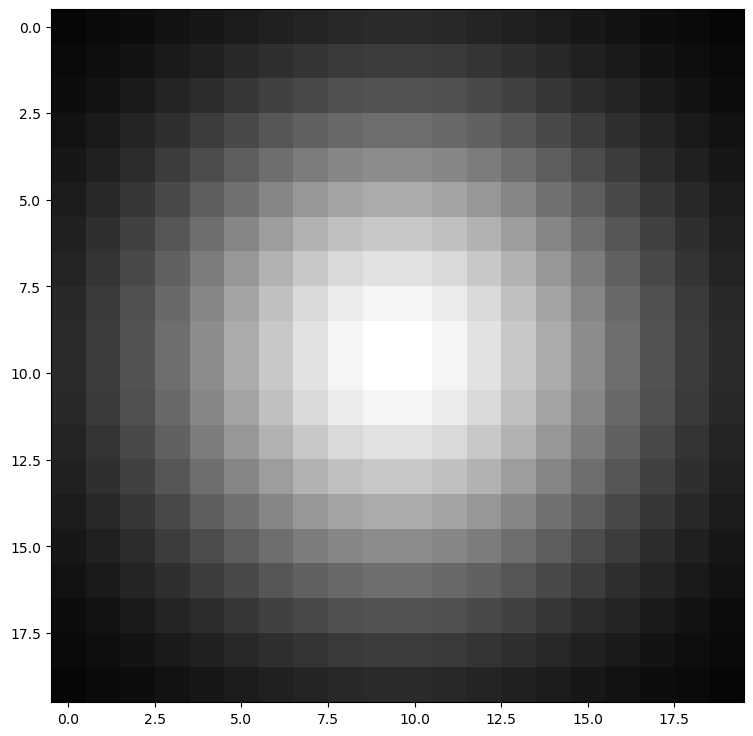

In [241]:
gauss = ventana_gauss(20, 5)
mostrar(pasarALog(gauss))

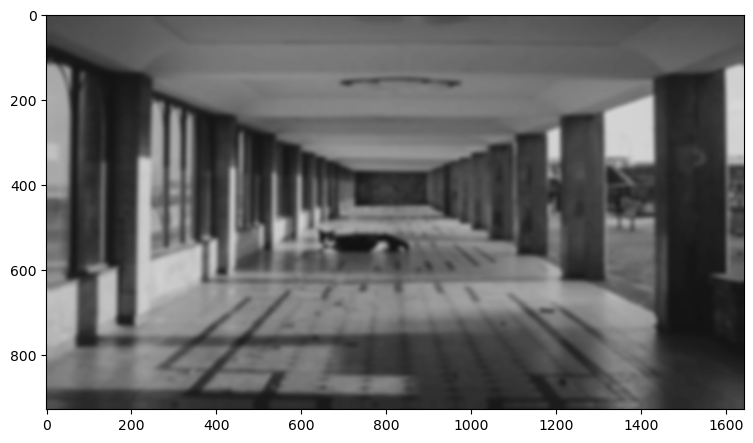

In [242]:
suave = signal.convolve2d(imagenA, gauss, boundary="symm")
mostrar(suave)

In [243]:
def sharpen(imagen, std, cantidad):
    gauss = ventana_gauss(int(4 * std), std)
    suave = signal.convolve2d(imagen, gauss, boundary="symm", mode="same")
    diferencia = imagen - suave
    return imagen + cantidad * diferencia

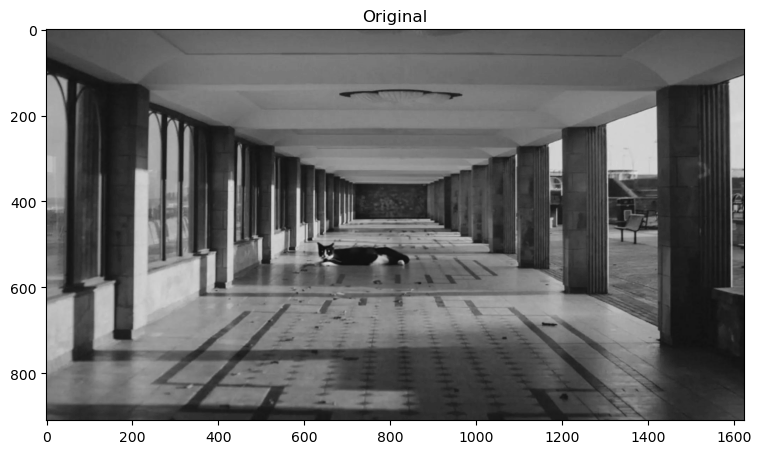

In [244]:
mostrar(imagenA, "Original")

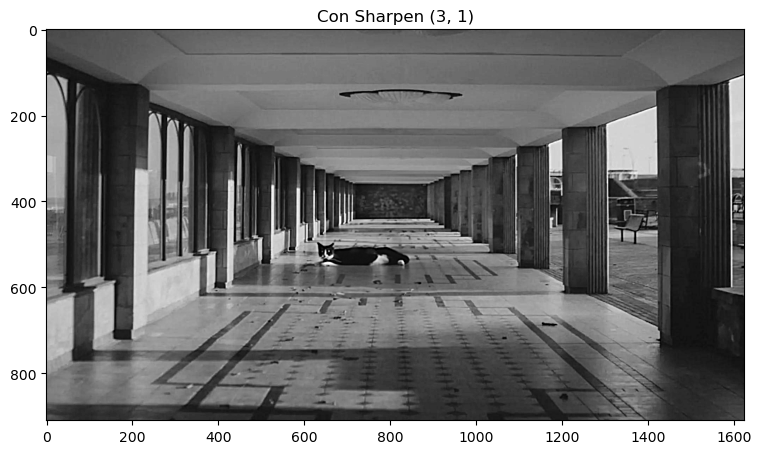

In [249]:
mostrar(sharpen(imagenA, 3, 1), "Con Sharpen (3, 1)")

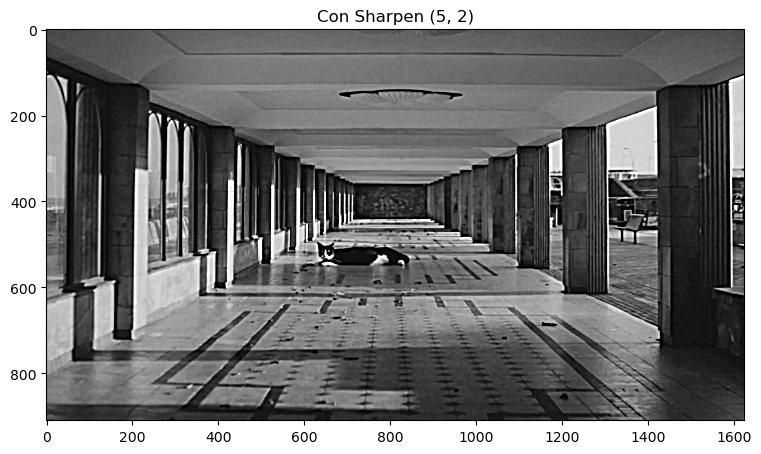

In [246]:
mostrar(sharpen(imagenA, 5, 2), "Con Sharpen (5, 2)")

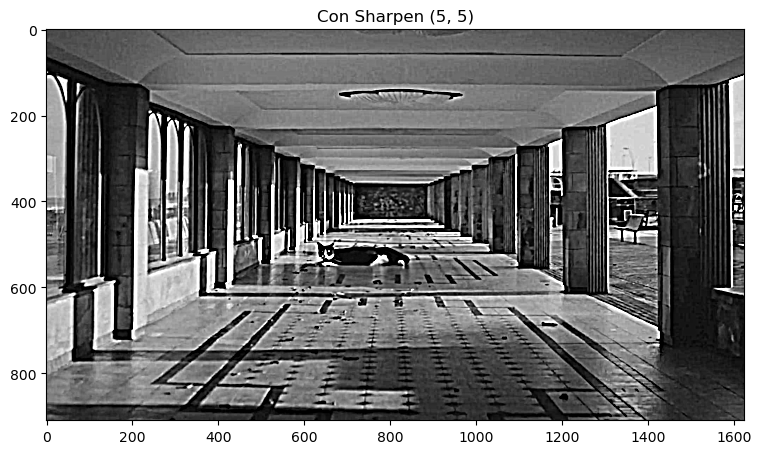

In [247]:
mostrar(sharpen(imagenA, 5, 5), "Con Sharpen (5, 5)")

### Ejercicio 4

In [250]:
robertsNW = np.array([[-1, 0], [0, 1]])
robertsNE = np.flip(robertsNW, axis = 1)

prewitt_H = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_V = prewitt_H.T

sobel_H = np.array([[-1, -2, -1], [0,0,0], [1, 2, 1]])
sobel_V = sobel_H.T

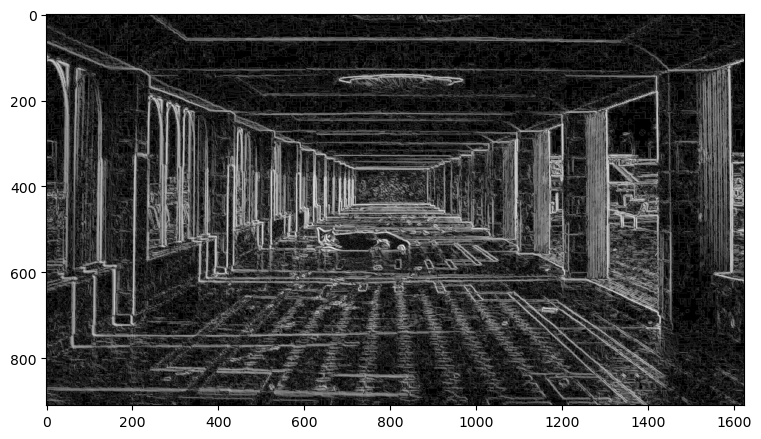

In [298]:
prueba1 = signal.convolve2d(imagenA, robertsNE, boundary="symm", mode="same")
# prueba1 = prueba1 + abs(np.min(prueba1))
# prueba = np.abs(prueba)
mostrar(pasarALog(np.abs(prueba1)))

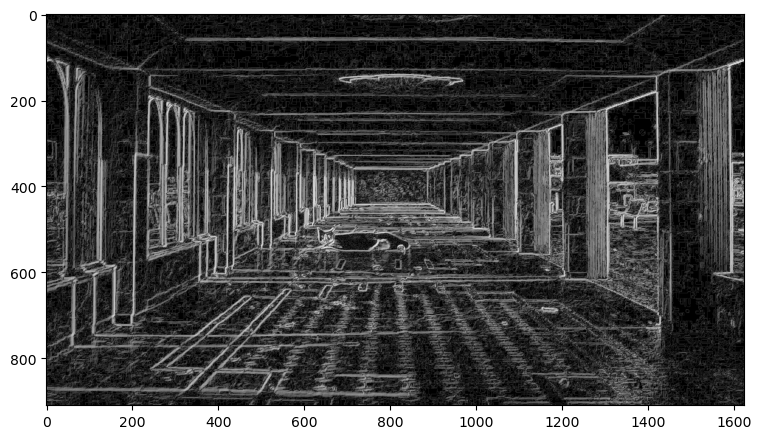

In [300]:
prueba = signal.convolve2d(imagenA, robertsNW, boundary="symm", mode="same")
# prueba = prueba + abs(np.min(prueba))
# prueba = np.abs(prueba)
mostrar(pasarALog(np.abs(prueba)))

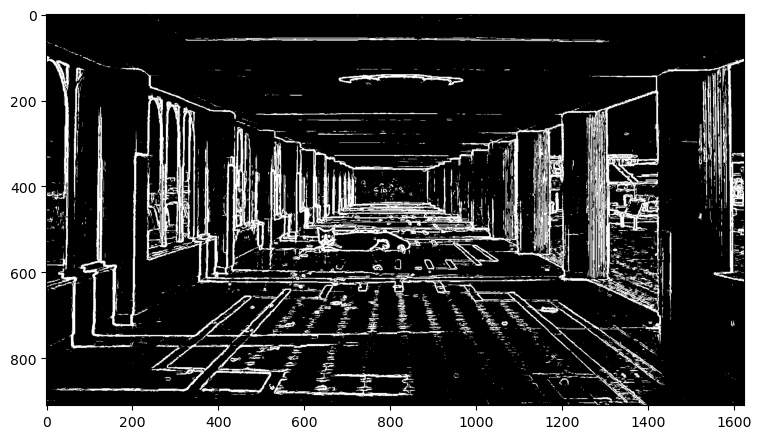

In [309]:
mostrar(aplicar_umbral(pasarALog(np.abs(prueba) + np.abs(prueba1)), 130))

In [313]:
def bordes_gradiente(imagen, umbral, metodo = "roberts"):
    
    #roberts:
    h1 = np.array([[-1, 0], [0, 1]])
    h2 = np.flip(h1, axis = 1)
        
    if metodo == "prewitt":
        h1 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
        h2 = h1.T
        
    if metodo == "sobel":
        h1 = np.array([[-1, -2, -1], [0,0,0], [1, 2, 1]])
        h2 = h1.T
    
    im1 = signal.convolve2d(imagen, h1, boundary="symm", mode="same")
    im2 = signal.convolve2d(imagen, h2, boundary="symm", mode="same")
    
    imagen_res = np.abs(im1) + np.abs(im2)
    
    return aplicar_umbral(imagen_res, umbral)
    

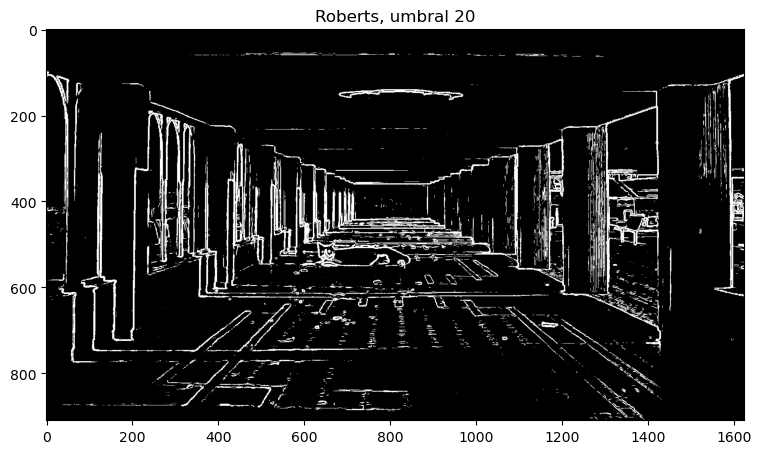

In [318]:
mostrar(bordes_gradiente(imagenA, 20), titulo="Roberts, umbral 20")

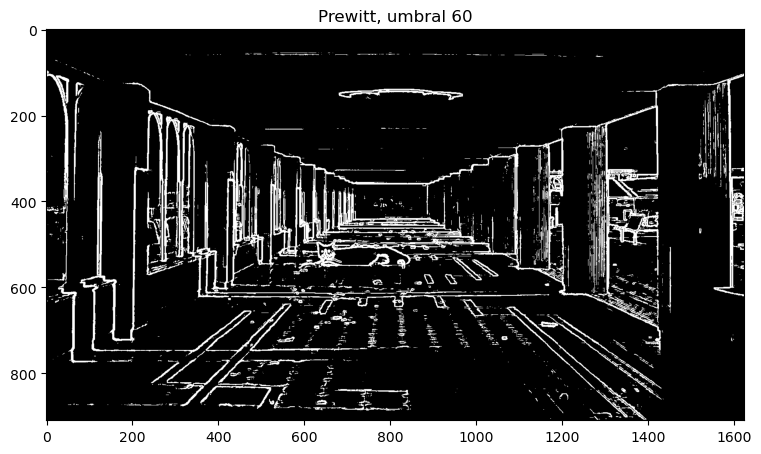

In [324]:
mostrar(bordes_gradiente(imagenA, 60, metodo= "prewitt"), titulo="Prewitt, umbral 60")

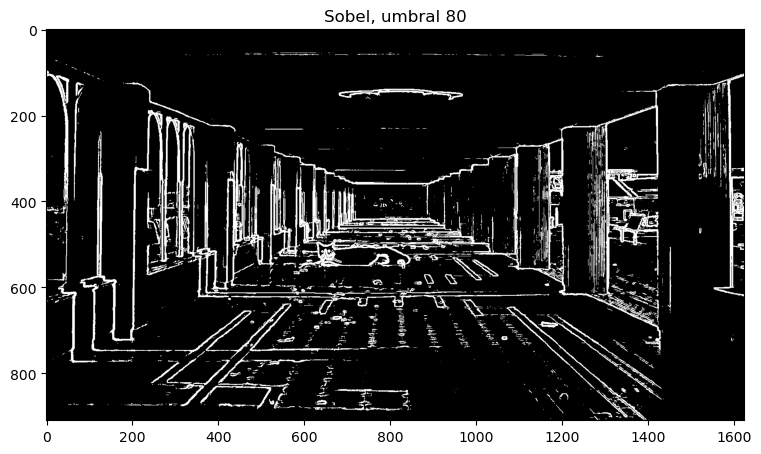

In [329]:
mostrar(bordes_gradiente(imagenA, 80, metodo= "sobel"), titulo="Sobel, umbral 80")